![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*


----

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.



# Proyecto

### Equipo:

- \<Raimundo Sandoval\>
- \<Cristóbal Subiabre\>


### Link de repositorio de GitHub: `https://github.com/raisando/Laboratorio-MDS7202->`




## 1. Introducción


El problema que abordamos en este proyecto es el desarrollo de un modelo de riesgo crediticio para el banco de Giturra. Con este modelo, buscamos predecir la probabilidad de que los clientes incumplan con sus pagos de crédito. Para hacerlo, nos basamos en una variedad de variables de entrada que Giturra nos proporcionó, que incluyen historiales de crédito, ingresos y otros factores financieros relevantes de los clientes.

Al evaluar los modelos generados, es crucial seleccionar una métrica que tenga en cuenta el desbalanceo de los datos y la importancia de identificar correctamente a los clientes que probablemente incumplirán con sus pagos. Elegimos utilizar el F1-score como nuestra métrica principal debido a que combina la precisión y el recall, permitiéndonos balancear la importancia de identificar correctamente a los clientes de alto riesgo (precisión) y la necesidad de capturar a la mayor cantidad posible de estos clientes (recall).

El F1-score es particularmente relevante para este proyecto porque los clientes que incumplen con sus pagos representan un coste significativo para el banco. Si nuestro modelo puede identificar con alta precisión a estos clientes, Giturra podrá tomar medidas preventivas para minimizar estas pérdidas. Al mismo tiempo, queremos asegurarnos de que nuestro modelo tenga un buen recall para que pueda identificar a la mayoría de los clientes de alto riesgo, permitiendo a Giturra tomar decisiones más informadas en cuanto a los préstamos.

## 2. Lectura y Manejo de Datos




### 2.1 Cargar datos en dataframes

Primero se realiza la conexion con drive.

In [1]:
#!git clone https://gitlab.com/imezadelajara/datos_proyecto_1_mds7202.git

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
  from google.colab import drive
  import os
  drive.mount("/content/drive")
  path = '/content/drive/MyDrive/U. Chile/9no Semestre 2023/Laboratorio Programación Cientifica/Proyecto_2'
  #path = '/content/datos_proyecto_1_mds7202'
  os.chdir(path)
except:
  print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


Luego, se procede a cargar los df

In [3]:
import pandas as pd

df = pd.read_parquet("dataset.pq")

### 2.2 EDA

Ahora se revisan las primeras 5 filas del dataset.

In [4]:
df.head(5)

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


Se carga el Analisis Exploratorio adjunto en los datos del lab creado por la libreria ydata_profiling para realizar un analisis exploratorio

In [5]:
import IPython.display as display
with open('profile.html', 'r') as f:
    eda_html = f.read()

#display.display(display.HTML(eda_html))

Además, se revisa el tipo de dato de cada columna usando info().

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

<Axes: >

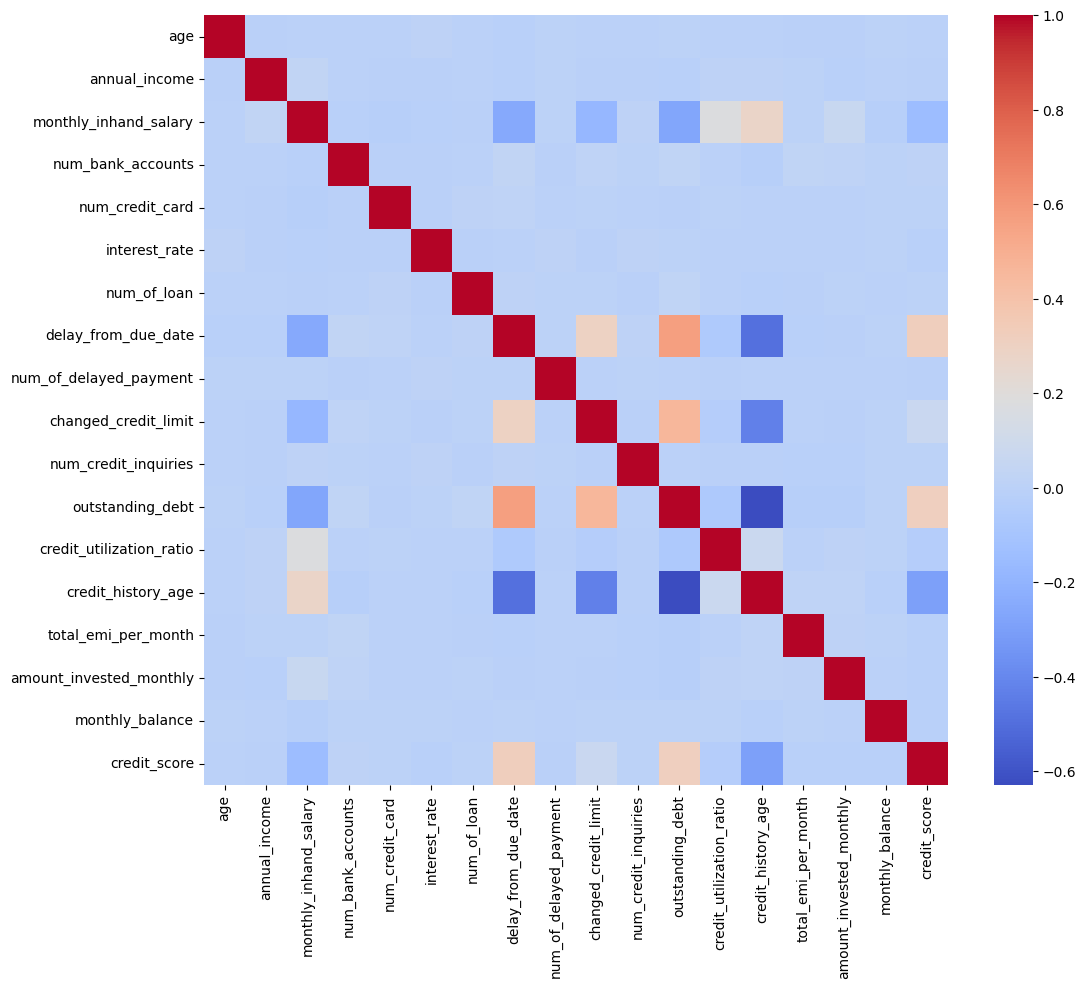

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Checking the correlation between the features
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')

## 3. Preparación de los Datos

En primer lugar, del eda se pudo notar que existen datos con valores mal ingresados, por ello, se eliminan algunas filas que presentan datos de este estilo. Además, se vio que existen outliers, por lo cual se eliminan tambien las filas con valores sobre el 95% de los datos cuando se estima conveniente.

In [8]:
df = df[(df['age'] >= 15) & (df['age'] <= 100)]
df = df[(df['num_bank_accounts'] >= 0) & (df['num_bank_accounts'] <= 10)] # Tomando el 95% como referencia para el corte
df = df[(df['num_credit_card'] >= 0) & (df['num_credit_card'] <= 10)] # Tomando el 95% como referencia para el corte
df = df[(df['interest_rate'] >= 0) & (df['interest_rate'] <= 33)] # Tomando el 95% como referencia para el corte
df = df[(df['num_of_loan'] >= 0) & (df['num_of_loan'] <= 8)] # Tomando el 95% como referencia para el corte
df = df[(df['num_of_delayed_payment'] >= 0) & (df['num_of_delayed_payment'] <= 24)] # Tomando el 95% como referencia para el corte
df = df[(df['num_credit_inquiries'] >= 0) & (df['num_credit_inquiries'] <= 14)] # Tomando el 95% como referencia para el corte
df = df[(df['total_emi_per_month'] >= 0) & (df['total_emi_per_month'] <= 593)] # Tomando el 95% como referencia para el corte

### 3.3 Feature Engineering
En primer lugar, se crearan un numero de variables como el ratio entre income y loan, o income  deuda. Estos ratios pueden ayudarnos a tener una mejor representacion de estos valores y como afectan realmente al riesgo de no pago.
Por otro lado, podemos cambiar e tipo de 'payment_of_min_amount' a binaria con nulos.

Se debe tener cuidado con no generar divisiones por 0, y por lo tanto finalmente se reemplazan con nan values.

In [9]:
import numpy as np
df['income_to_loan_ratio'] = df['annual_income'] / df['total_emi_per_month']
df['debt_to_income_ratio'] = df['outstanding_debt'] / df['annual_income']
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0,'nm':np.NAN})
df.replace([np.inf, -np.inf], np.nan, inplace=True)


Adicionalmente, se va a revisar la existencia de datos na.

In [10]:
df.isna().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1277
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment         0
changed_credit_limit         171
num_credit_inquiries           0
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age           741
payment_of_min_amount        924
total_emi_per_month            0
amount_invested_monthly      374
payment_behaviour              0
monthly_balance              234
credit_score                   0
income_to_loan_ratio         995
debt_to_income_ratio           0
dtype: int64

### 3.1 Preprocesamiento con Column Transformer

En vista del Analisis Exploratorio se pudo notar que las columnas estan con los tipos de datos que corresponde, además, se pudo tambien ver que para generar el modelo, se van a utilizar todas las columnas, exceptuando customer_id, debido a que es una variable que identifica al usuario y no es util al momento de generalizar. Por otro lado, se aplicaran con column transformer standarizaciones minmax, standard y onehot segun corresponde y la distribucion de cada columna.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

ss_attribs = ['income_to_loan_ratio','debt_to_income_ratio',
              "age", 'num_of_loan', 'delay_from_due_date', 
              'num_of_delayed_payment', 'changed_credit_limit', 
              'outstanding_debt', 'credit_history_age', 'amount_invested_monthly', 
              'monthly_balance']

oh_attribs = ["occupation", 'payment_behaviour']

mms_attribs = ["annual_income", "monthly_inhand_salary", 
       'num_bank_accounts', 'num_credit_card', 
       'interest_rate', 'num_credit_inquiries', 
       'credit_utilization_ratio', 'total_emi_per_month']


preprocessor = ColumnTransformer([
    ("StandardScaler",StandardScaler(),ss_attribs),
    ("MinMaxScaler",MinMaxScaler(),mms_attribs),
    ("OneHot",OneHotEncoder(sparse=False),oh_attribs)],
    remainder='drop'
)

# Establecer el formato de salida a pandas
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 ['income_to_loan_ratio',
                                  'debt_to_income_ratio', 'age', 'num_of_loan',
                                  'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit', 'outstanding_debt',
                                  'credit_history_age',
                                  'amount_invested_monthly',
                                  'monthly_balance']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['annual_income', 'monthly_inhand_salary',
                                  'num_bank_accounts', 'num_credit_card',
                                  'interest_rate', 'num_credit_inquiries',
                                  'credit_utilization_ratio',
                                  'total_emi_per_month']),
                                ('OneHot', OneHotEncoder(sparse=False),
                                 ['occupation', 'payment_behaviour'])])

In [12]:
df

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,income_to_loan_ratio,debt_to_income_ratio
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,23.933795,NaN,0.0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0,385.560052,0.042376
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,32.933856,27.0,0.0,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0,1852.011193,0.017362
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,38.374753,18.0,0.0,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0,579.623854,0.009102
7,CUS_0x5407,30.0,Media_Manager,34081.38,2611.115000,8,7,15,3.0,30,...,33.823488,15.0,1.0,70.478333,29.326364,High_spent_Medium_value_payments,411.306804,1,483.572450,0.050003
8,CUS_0x4157,24.0,Doctor,114838.41,9843.867500,2,5,7,3.0,11,...,27.813354,21.0,0.0,226.892792,254.571767,High_spent_Large_value_payments,742.922191,0,506.135118,0.011997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,CUS_0x51b3,33.0,Media_Manager,59146.36,4908.863333,3,6,6,1.0,8,...,27.682186,20.0,0.0,26.778419,10000.000000,Low_spent_Large_value_payments,NaN,0,2208.732315,0.007068
12494,CUS_0x2084,21.0,Architect,38321.39,3106.647859,4,4,3,4.0,6,...,28.951691,17.0,0.0,362.072453,259.135635,Low_spent_Medium_value_payments,NaN,0,105.839010,0.017707
12496,CUS_0xf16,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,...,41.212367,NaN,0.0,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0,405.714070,0.053785
12497,CUS_0xaf61,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,39.300980,30.0,0.0,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0,441.632690,0.016689


### 3.3 Datos Nulos

Adicionalmente, se van a revisar cuantos datos nulos tiene cada columna del set de entrenamiento.

In [13]:
df.isnull().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1277
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment         0
changed_credit_limit         171
num_credit_inquiries           0
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age           741
payment_of_min_amount        924
total_emi_per_month            0
amount_invested_monthly      374
payment_behaviour              0
monthly_balance              234
credit_score                   0
income_to_loan_ratio         995
debt_to_income_ratio           0
dtype: int64

En vista de lo anterior, se decidio que los valores nulos seran imputados con 0, esto bajo la premisa de que se busca predecir para todos los clientes y no solo para aquellos que tienen los datos bien registrados.

In [14]:
df_nn = df.fillna(0)

### 3.2 Holdout

Se utiliza train test split para generar un conjunto de entrenamiento y otro de prueba.

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['credit_score', 'customer_id'])
y = df['credit_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1999)

## 4. Baseline

Se crean los modelos más basicos posibles modo de contar con un baseline, los valores nulos seran imputados por 0, esto con tal de no perder cantidad de filas y además, que de tal modo el modelo debiese ser capaz de generalizar incluso con datos mal ingresados, esto debido a que se busca realizar la prediccion para todos los clientes y no solo para los que tienen bien ingresados los datos.

Primero se define el column transformer añadiendole el imputador

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score

ss_attribs = ['income_to_loan_ratio','debt_to_income_ratio',
              "age", 'num_of_loan', 'delay_from_due_date', 
              'num_of_delayed_payment', 'changed_credit_limit', 
              'outstanding_debt', 'credit_history_age', 'amount_invested_monthly', 
              'monthly_balance']

oh_attribs = ["occupation", 'payment_behaviour']

mms_attribs = ["annual_income", "monthly_inhand_salary", 
       'num_bank_accounts', 'num_credit_card', 
       'interest_rate', 'num_credit_inquiries', 
       'credit_utilization_ratio', 'total_emi_per_month']


preprocessor = ColumnTransformer([
    ("StandardScaler", Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('std_scaler', StandardScaler())
    ]), ss_attribs),
    ("OneHot", Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(sparse_output=False))
    ]), oh_attribs),
    ("MinMaxScaler", Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('minmax_scaler', StandardScaler())
    ]), mms_attribs)],
    remainder='drop'
)

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer

model_results = {}

#precision_scorer = make_scorer(precision_score, pos_label=1)

models = [
    ('dummy_clf', DummyClassifier(strategy="stratified")),
    ('logistic_regression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LightGBMClassifier', LGBMClassifier()),
    ('XGBClassifier', XGBClassifier())
]

for model_name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    print(f'Training {model_name} classifier')

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)

    model_results[model_name] = {
        'classification_report': report,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

Training dummy_clf classifier
Training logistic_regression classifier
Training KNeighborsClassifier classifier
Training DecisionTreeClassifier classifier
Training SVC classifier
Training RandomForestClassifier classifier
Training LightGBMClassifier classifier
[LightGBM] [Info] Number of positive: 1763, number of negative: 4855
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2600
[LightGBM] [Info] Number of data points in the train set: 6618, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266395 -> initscore=-1.012992
[LightGBM] [Info] Start training from score -1.012992
Training XGBClassifier classifier


Ahora se transforma el diccionario de metricas en df.

In [18]:
df_metricas = pd.DataFrame(model_results).transpose()
df_metricas_ordenado = df_metricas.sort_values(by='f1_score', ascending=False)

In [19]:
df_metricas_ordenado

,classification_report,accuracy,precision,recall,f1_score
LightGBMClassifier,precision recall f1-score ...,0.786103,0.773613,0.786103,0.772009
RandomForestClassifier,precision recall f1-score ...,0.783686,0.77063,0.783686,0.768157
XGBClassifier,precision recall f1-score ...,0.769789,0.754144,0.769789,0.753947
SVC,precision recall f1-score ...,0.775831,0.761518,0.775831,0.752837
KNeighborsClassifier,precision recall f1-score ...,0.754079,0.734609,0.754079,0.735378
logistic_regression,precision recall f1-score ...,0.759517,0.73993,0.759517,0.735021
DecisionTreeClassifier,precision recall f1-score ...,0.702719,0.69692,0.702719,0.699589
dummy_clf,precision recall f1-score ...,0.613897,0.609001,0.613897,0.61138


- ¿Hay algún clasificador entrenado mejor que el azar (Dummy)? 

**Respuesta** Todos los clasificadores entrenados son mejores que el dummy. 
- ¿Cuál es el mejor clasificador entrenado?

**Respuesta** En este momento, los mejores performers son LightGBM y un RF. Pero todos tienen performances bastante parecidas entre los primeros 5.
- ¿Por qué el mejor clasificador es mejor que los otros?

**Respuesta** Dado que ambos son algoritmos basados en arboles, se puede intuir que su alta performance se debe a que estos tipos de clasificadores son particularmente buenos tratando con data de multiples tipos como numericas y categoricas; por otro lado, logran capturar de manera natural las interacciones entre las variables, y por lo tanto no son tan afectados por la falta de o la presencia de feature engineering, al igual que a la escalacion/estandarizacion de la data. Finalmente, tienen la ventaja que dentro de la construccion de los arboles ocurre una especie de "seleccion de variables" de mayor importancia y por lo tanto tienen un grado de optimizacion mayor que otros tipos de algoritmos.
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Respuesta** En general LightGBM tiene la ventaja en cuanto a tiempo de computo. 

## 5. Optimización del Modelo

Ahora entonces se realiza grid search sobre los 2 mejores modelos del paso anterior, con tal de encontrar los mejores paramentros.

In [20]:
model_results_grid = {}

models = [
    ('RandomForestClassifier', RandomForestClassifier(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 5, 7]}),
    ('LightGBMClassifier', LGBMClassifier(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.2]}),
]

for model_name, model, params in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    print(f'Training {model_name} classifier:')

    param_grid = params

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1)

    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    report = classification_report(y_test, y_pred)

    model_results_grid[model_name] = {
        'best_params': grid_search.best_params_,
        'classification_report': report,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

Training RandomForestClassifier classifier:
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training LightGBMClassifier classifier:
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 1410, number of negative: 3884
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2600
[LightGBM] [Info] Number of data points in the train set: 5294, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266339 -> initscore=-1.013276
[LightGBM] [Info] Start training from score -1.013276
[LightGBM] [Info] Number of positive: 1410, number of negative: 3884
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2600
[LightGBM] [Info] Number of data p

In [21]:
df_metricas_grid = pd.DataFrame(model_results_grid).transpose()
df_metricas_ordenado_grid = df_metricas_grid.sort_values(by='f1_score', ascending=False)

In [22]:
df_metricas_ordenado_grid

,best_params,classification_report,accuracy,precision,recall,f1_score
LightGBMClassifier,"{'model__learning_rate': 0.05, 'model__n_estim...",precision recall f1-score ...,0.787915,0.77571,0.787915,0.772563
RandomForestClassifier,"{'model__max_depth': 7, 'model__n_estimators':...",precision recall f1-score ...,0.782477,0.769221,0.782477,0.764432


In [23]:
df_metricas_ordenado_grid.iloc[0,0]

{'model__learning_rate': 0.05, 'model__n_estimators': 50}

En vista de lo anterior el mejor modelo es LightGBMClassifier, por lo cual se realiza la predicción sobre los datos de prueba.

In [24]:
# LGBMClassifier
lgbm_clf = LGBMClassifier(learning_rate = 0.05, n_estimators = 50)
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lgbm_clf)])

lgbm_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1763, number of negative: 4855
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2600
[LightGBM] [Info] Number of data points in the train set: 6618, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266395 -> initscore=-1.012992
[LightGBM] [Info] Start training from score -1.012992


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['income_to_loan_ratio',
                                                   'debt_to_income_ratio',
                                                   'age', 'num_of_loan',
                                                   'delay_from_due_date',
                                                   'num_of_delayed_payment',
                                                   'changed_credit_limit',
                                                   'outstanding_debt',
                                                   'c...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('minmax_scaler',
                                                                   StandardScaler())]),
                                                  ['annual_income',
                                                   'monthly_inhand_salary',
                                                   'num_bank_accounts',
                                                   'num_credit_card',
                                                   'interest_rate',
                                                   'num_credit_inquiries',
                                                   'credit_utilization_ratio',
                                                   'total_emi_per_month'])])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.05, n_estimators=50))])

In [25]:
y_pred = lgbm_pipeline.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1192
           1       0.68      0.45      0.54       463

    accuracy                           0.79      1655
   macro avg       0.75      0.68      0.70      1655
weighted avg       0.78      0.79      0.77      1655



## 6. Interpretabilidad

El metodo propuesto es realizar el calculo de importancia mediante permutacion, esto debido a que entrega una vision clara de cuales son las variables que más afectan en el modelo. Para ello entonces, la implementación es la siguiente.

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score

# Crear una función para calcular la importancia de las características mediante permutación
def permutation_importance(model, X, y, metric, n_repeats = 10, random_state = 1999):
    rng = np.random.RandomState(random_state)
    importances = {}

    for feature in X.columns:
        scores = []
        X_permuted = X.copy()

        for _ in range(n_repeats):
            permuted_values = rng.permutation(X[feature])
            X_permuted[feature] = permuted_values
            y_pred = model.predict(X_permuted)
            score = metric(y, y_pred)
            scores.append(score)

        importances[feature] = np.mean(scores)

    return importances

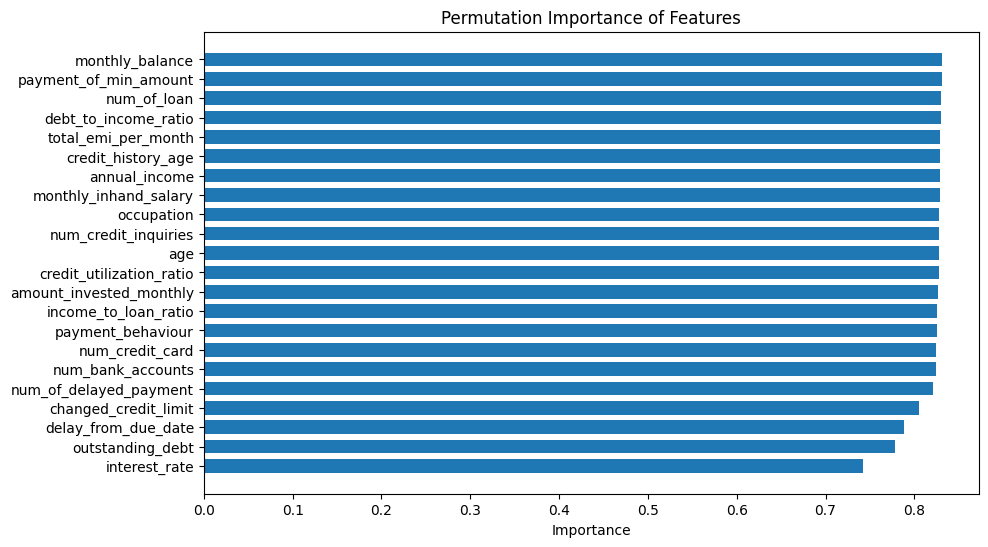

In [28]:
import matplotlib.pyplot as plt
# Calcular la importancia de las características mediante permutación
importance = permutation_importance(lgbm_pipeline, X_train, y_train, metric = accuracy_score)

# Obtener los nombres de las características y sus importancias
feature_names = list(importance.keys())
feature_importances = list(importance.values())
sorted_indices = np.argsort(feature_importances)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, height=0.7)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Permutation Importance of Features')
plt.show()

En primer lugar, a partir de la distribucion de importancia en el modelo, se puede ver que esta es en general coherente y equitativa, existiendo solo 3 variables que tienen una importancia "Algo" menor.

                          Credit Score
credit_score                  1.000000
interest_rate                 0.326507
outstanding_debt              0.315211
delay_from_due_date           0.306032
num_credit_inquiries          0.298601
num_credit_card               0.285891
credit_history_age            0.272178
num_of_loan                   0.262880
debt_to_income_ratio          0.252428
payment_of_min_amount         0.235061
num_bank_accounts             0.223407
num_of_delayed_payment        0.175357
monthly_inhand_salary         0.126392
age                           0.097183
changed_credit_limit          0.073104
total_emi_per_month           0.023752
monthly_balance               0.018314
credit_utilization_ratio      0.017838
amount_invested_monthly       0.013791
annual_income                 0.006236
income_to_loan_ratio          0.000355


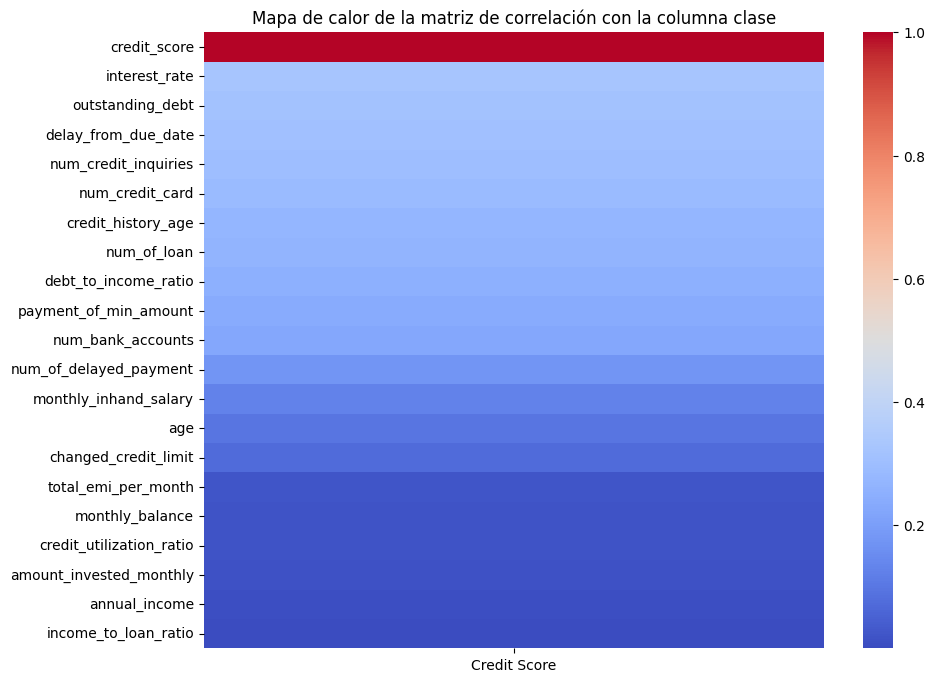

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de correlación entre las variables numéricas y la columna clase
corr_with_target = df.select_dtypes(include='number').corrwith(df['credit_score'])

# Crear un DataFrame con la matriz de correlación con la columna clase
corr_df = pd.DataFrame(corr_with_target, columns=['Credit Score'])

# Ordenar las correlaciones de forma descendente
sorted_corr_df = corr_df.abs().sort_values(by='Credit Score', ascending=False)

# Imprimir el DataFrame ordenado con las correlaciones
print(sorted_corr_df)

# Crear un mapa de calor para visualizar las correlaciones con la columna clase
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_df, annot=False, cmap='coolwarm')
plt.title('Mapa de calor de la matriz de correlación con la columna clase')
plt.show()

En vista de lo anterior se puede ver que hay columnas que tienen una baja correlación con la variable de interes, como lo es annual_income, amount_investe_monthly, credit_utilization_ratio, montly_balance y total_emi_per_month por ejemplo.

## 7. Concluir

En este proyecto, logramos desarrollar un modelo predictivo para identificar clientes con alto o bajo riesgo de no-pago para nuestro cliente Giturra. Los resultados son aceptables, pero hay espacio para mejorar la precisión de las predicciones. A través del análisis exploratorio de datos, pudimos entender profundamente las características de los datos, lo que fue crucial para crear características más relevantes, y diseñar una estrategia efectiva de preprocesamiento de datos.

El modelo base dummy no tuvo un buen rendimiento, pero los demás modelos probados mostraron un rendimiento considerablemente mejor, aunque bastante similar entre sí. Esto sugiere la complejidad del problema y la dificultad para modelarlo con las características disponibles. A pesar de estos desafíos, logramos optimizar ligeramente el modelo base, mejorando su rendimiento en aproximadamente un punto porcentual.

Estamos satisfechos con los resultados obtenidos, ya que proporcionan una base sólida para futuras mejoras. Creemos que es probable que haya mejores formas de modelar este problema, como utilizar series de tiempo o modelos más avanzados como las redes neuronales. O derechamente abordar el problema de otra manera, como un puntaje de cliente, o mas de una clase en el output.

En general, este proyecto nos ha enseñado cómo abordar un problema de clasificación binaria en un contexto de negocio real, cómo aplicar varias técnicas de preprocesamiento de datos, selección de características y modelado y cómo evaluar y optimizar el rendimiento de los modelos.
